In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [3]:
df=pd.read_csv('G:\data analysis\GRIP @ SPARK\_task 2\SampleSuperstore.csv')  #loading the file
df #printing first 5 rows


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [49]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df['Country'].value_counts()
df['City'].value_counts()
df['State'].value_counts()
df['Region'].value_counts()
df['Category'].value_counts()
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [68]:

df3=df
df3[['Ship Mode','Segment','Region','Category','Sub-Category']] = df3[['Ship Mode','Segment','Region','Category','Sub-Category']].astype('category')
df3.dtypes
df3['Ship Mode'] = df3['Ship Mode'].cat.codes
df3['Segment'] = df3['Segment'].cat.codes
df3['Region'] = df3['Region'].cat.codes
df3['Category'] = df3['Category'].cat.codes
df3['Sub-Category'] = df3['Sub-Category'].cat.codes
df3=df3.drop(columns=['Country','City','State','Postal Code'],axis=1)
df3.head()

,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2,0,2,0,4,261.9600,2,0.00,41.9136
1,2,0,2,0,5,731.9400,3,0.00,219.5820
2,2,1,3,1,10,14.6200,2,0.00,6.8714
3,3,0,2,0,16,957.5775,5,0.45,-383.0310
4,3,0,2,1,14,22.3680,2,0.20,2.5164


In [69]:
corr=df3.corr()

<AxesSubplot:>

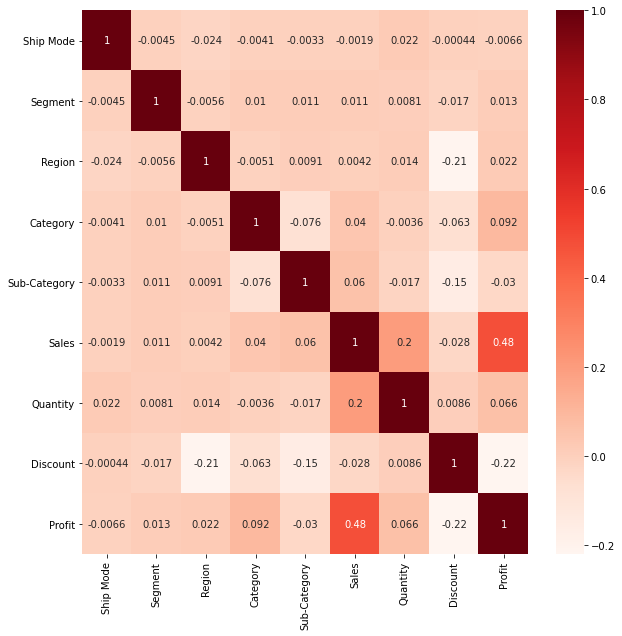

In [71]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='Reds')


In [6]:
df1=pd.get_dummies(df, columns=["Ship Mode",'Segment','Region','Category','Sub-Category'])
df1

,Country,City,State,Postal Code,Sales,Quantity,Discount,Profit,Ship Mode_First Class,Ship Mode_Same Day,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,United States,Henderson,Kentucky,42420,261.9600,2,0.00,41.9136,0,0,...,0,0,0,0,0,0,0,0,0,0
1,United States,Henderson,Kentucky,42420,731.9400,3,0.00,219.5820,0,0,...,0,0,0,0,0,0,0,0,0,0
2,United States,Los Angeles,California,90036,14.6200,2,0.00,6.8714,0,0,...,0,0,0,1,0,0,0,0,0,0
3,United States,Fort Lauderdale,Florida,33311,957.5775,5,0.45,-383.0310,0,0,...,0,0,0,0,0,0,0,0,0,1
4,United States,Fort Lauderdale,Florida,33311,22.3680,2,0.20,2.5164,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,United States,Miami,Florida,33180,25.2480,3,0.20,4.1028,0,0,...,0,0,1,0,0,0,0,0,0,0
9990,United States,Costa Mesa,California,92627,91.9600,2,0.00,15.6332,0,0,...,0,0,1,0,0,0,0,0,0,0
9991,United States,Costa Mesa,California,92627,258.5760,2,0.20,19.3932,0,0,...,0,0,0,0,0,0,1,0,0,0
9992,United States,Costa Mesa,California,92627,29.6000,4,0.00,13.3200,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
df1=df1.drop(columns=['Country','City','State','Postal Code'],axis=1)

#df["City"] = df["City"].cat.codes
#df["State"] = df["State"].cat.codes
#df['Sub-Category'] = df['Sub-Category'].cat.codes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales                     9994 non-null   float64
 1   Quantity                  9994 non-null   int64  
 2   Discount                  9994 non-null   float64
 3   Profit                    9994 non-null   float64
 4   Ship Mode_First Class     9994 non-null   uint8  
 5   Ship Mode_Same Day        9994 non-null   uint8  
 6   Ship Mode_Second Class    9994 non-null   uint8  
 7   Ship Mode_Standard Class  9994 non-null   uint8  
 8   Segment_Consumer          9994 non-null   uint8  
 9   Segment_Corporate         9994 non-null   uint8  
 10  Segment_Home Office       9994 non-null   uint8  
 11  Region_Central            9994 non-null   uint8  
 12  Region_East               9994 non-null   uint8  
 13  Region_South              9994 non-null   uint8  
 14  Region_W

In [53]:
x=df1.corr()['Profit']#.sort_values()
df2=pd.DataFrame(data=x)
df2
x2=df1.corr()#.sort_values()


<AxesSubplot:>

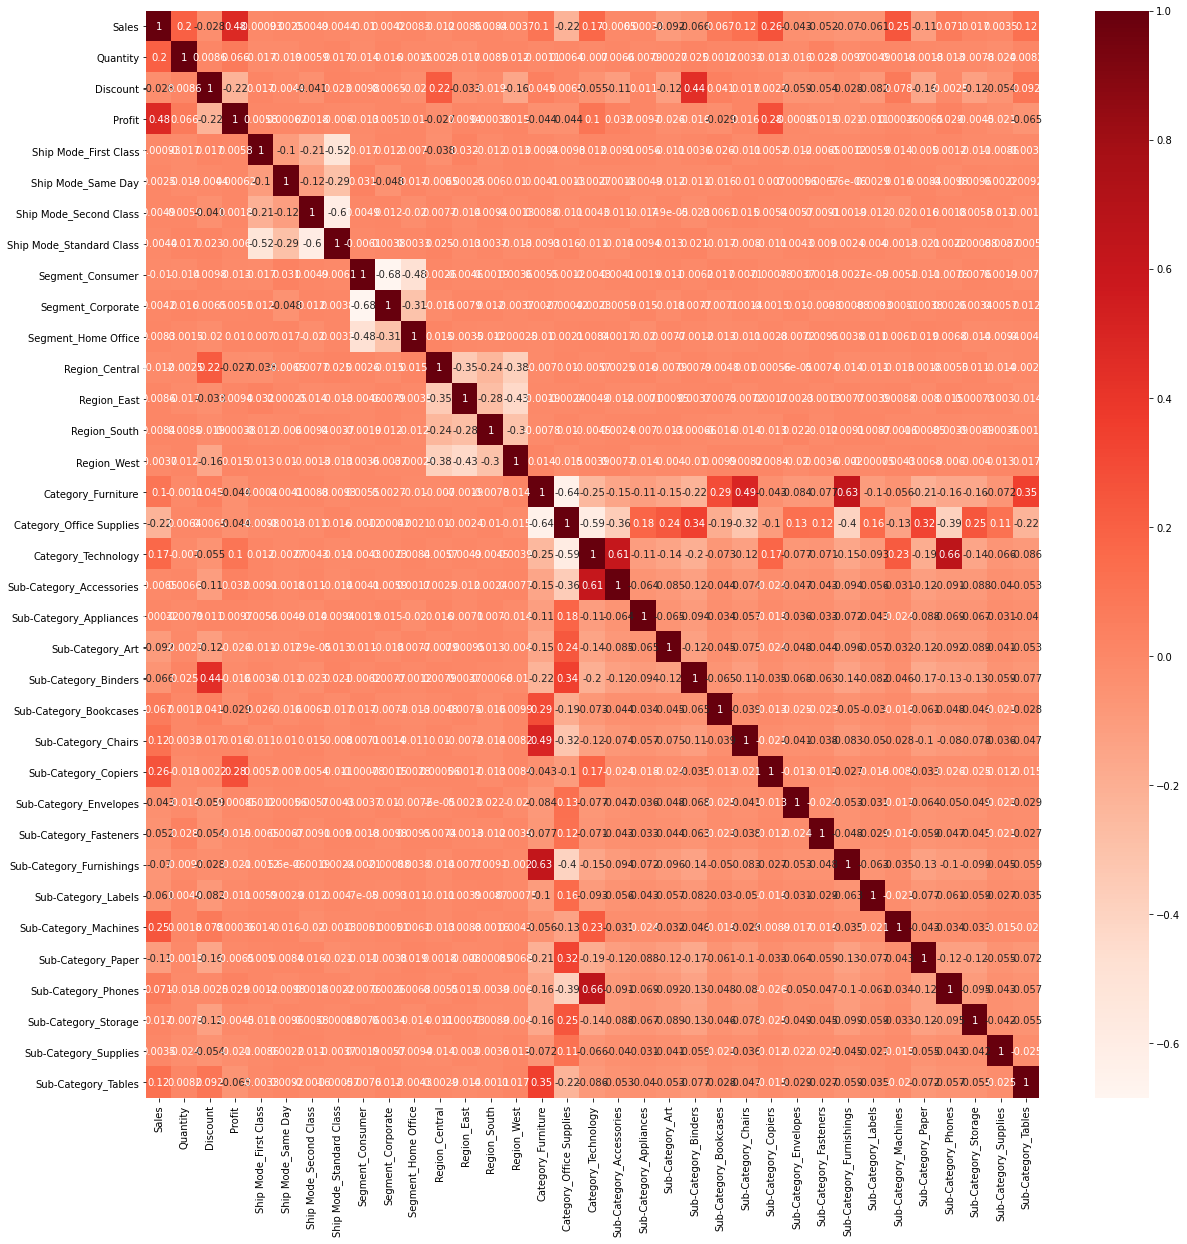

In [57]:

plt.figure(figsize=(20,20))
sns.heatmap(x2,annot=True,cmap='Reds')

In [48]:
x1 = df1.iloc[:, :].values
df1

,Sales,Quantity,Discount,Profit,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,261.9600,2,0.00,41.9136,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,731.9400,3,0.00,219.5820,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,14.6200,2,0.00,6.8714,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,957.5775,5,0.45,-383.0310,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,22.3680,2,0.20,2.5164,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,25.2480,3,0.20,4.1028,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
9990,91.9600,2,0.00,15.6332,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
9991,258.5760,2,0.20,19.3932,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
9992,29.6000,4,0.00,13.3200,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


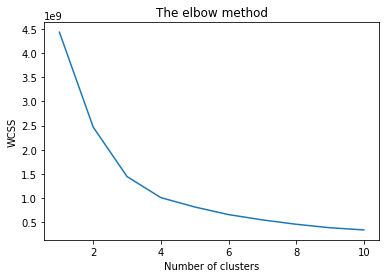

In [44]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [47]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x1)
y_kmeans

array([0, 2, 0, ..., 0, 0, 0])